In [106]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import folium # pip install folium
from folium import plugins
# import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
# import geopy # pip install geopy

from vega_datasets import data as vds # pip install vega_datasets


import warnings
warnings.filterwarnings("ignore")

In [107]:
boston_df = pd.read_csv('boston_house_prices.csv', header=1)



In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [85]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
boston_df.isna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
boston_df.isna().count()


CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

>> Todas las columnas están informadas.. Hurray!

In [78]:
# Tras haberme descargado un fichero de Crimen en Boston en 2015(https://www.kaggle.com/datasets/AnalyzeBoston/crimes-in-boston), 
#La idea es hacerlo fácil y asumir que los ratios de criminalidad se mantienen en 2015 desde 1978 para utilizar las latitudes y longitudes de los barrios
#no consigo abrirlo

Crimes = pd.read_csv("crime.csv", header=0)
Crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [80]:
Crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [79]:
Crimes["DISTRICT"].nunique()

12

In [248]:
Crimes.isna().count()

INCIDENT_NUMBER        319073
OFFENSE_CODE           319073
OFFENSE_CODE_GROUP     319073
OFFENSE_DESCRIPTION    319073
DISTRICT               319073
REPORTING_AREA         319073
SHOOTING               319073
OCCURRED_ON_DATE       319073
YEAR                   319073
MONTH                  319073
DAY_OF_WEEK            319073
HOUR                   319073
UCR_PART               319073
STREET                 319073
Lat                    319073
Long                   319073
Location               319073
dtype: int64

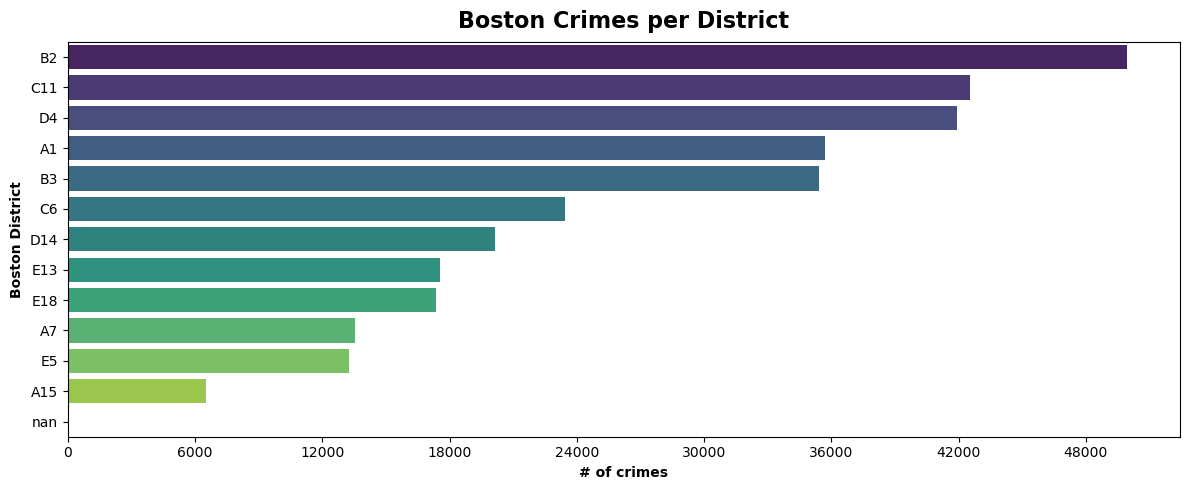

In [89]:
def offense_groups_countplot(data, title, xlabel, ylabel, size):
    plt.figure(figsize=size)
    ax = sns.countplot(y=data['DISTRICT'], palette='viridis', order=data['DISTRICT'].value_counts(dropna=False).index)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(title, fontsize=16, fontweight='bold', pad=10)
    plt.xlabel(xlabel, weight='bold')
    plt.ylabel(ylabel, weight='bold')
    plt.tight_layout()
    plt.show()

offense_groups_countplot(Crimes, 'Boston Crimes per District', '# of crimes', 'Boston District', (12,5))

In [88]:
Crimes["DISTRICT"].value_counts(dropna=False) #Me cuenta cuantas veces aparece un valor distinto, dropna=false no elimina los nans y me los cuenta

DISTRICT
B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
NaN     1765
Name: count, dtype: int64

In [96]:
boston_Police_HQ = pd.read_csv('BostonPoliceHQ.csv', index_col="NAME", header=0)
boston_Police_HQ.head()

,_id,X,Y,ADDRESS,ZIP,PARCEL_ID,OBJECTID,BLDG_ID,BID,POINT_X,POINT_Y,NEIGHBORHOOD,CITY,FT_SQFT,STORY_HT,District
NAME,,,,,,,,,,,,,,,,
District E-18 Police Station,1,757882.716120,2.918710e+06,1249 Hyde Park Ave,2136,1809107000,1,Bos_1809107000_B0,100639,757882.716120,2.918710e+06,Hyde Park,Boston,8585.0,2.0,E18
District E-5 Police Station,2,751313.455964,2.929725e+06,1708 Centre St,2132,2005719000,2,Bos_2005719000_B0,112112,751313.455964,2.929725e+06,West Roxbury,Boston,7708.0,2.0,E5
District A-7 Police Station,3,783655.302370,2.964400e+06,300 E Eagle St,2128,103711003,3,Bos_0103711003_B0,222774,783655.302000,2.964400e+06,East Boston,Boston,NaN,3.0,A7
District A-1 Police Station,4,775000.193367,2.957181e+06,40 Sudbury St,2114,302626000,4,Bos_0302626000_B0,136171,775000.193368,2.957181e+06,Boston,Boston,6882.0,5.0,A1
District D-14 Police Station,5,750621.846127,2.952539e+06,301 Washington St,2135,2202387000,5,Bos_2202387000_B0,145004,750621.846127,2.952539e+06,Brighton,Boston,8712.0,2.0,D14


In [104]:
#ME quedo con las columnas que me interesan. me quedo finalmente con FT_SQFT porque puede servirme para pintar el área de influencia... de cada comisaría..

selected_columns = ['District', 'X', 'Y', 'ADDRESS', "ZIP","NEIGHBORHOOD","CITY","FT_SQFT"]
boston_Police_HQ_selected = boston_Police_HQ[selected_columns]

In [105]:
boston_Police_HQ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, District E-18 Police Station to District C-11 Police Station
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           13 non-null     int64  
 1   X             13 non-null     float64
 2   Y             13 non-null     float64
 3   ADDRESS       13 non-null     object 
 4   ZIP           13 non-null     int64  
 5   PARCEL_ID     13 non-null     int64  
 6   OBJECTID      13 non-null     int64  
 7   BLDG_ID       13 non-null     object 
 8   BID           13 non-null     int64  
 9   POINT_X       13 non-null     float64
 10  POINT_Y       13 non-null     float64
 11  NEIGHBORHOOD  13 non-null     object 
 12  CITY          13 non-null     object 
 13  FT_SQFT       11 non-null     float64
 14  STORY_HT      12 non-null     float64
 15  District      12 non-null     object 
dtypes: float64(6), int64(5), object(5)
memory usage: 1.7+ KB


In [102]:
boston_Police_HQ_selected

,District,X,Y,ADDRESS,ZIP,NEIGHBORHOOD,CITY,FT_SQFT
NAME,,,,,,,,
District E-18 Police Station,E18,757882.716120,2.918710e+06,1249 Hyde Park Ave,2136,Hyde Park,Boston,8585.0
District E-5 Police Station,E5,751313.455964,2.929725e+06,1708 Centre St,2132,West Roxbury,Boston,7708.0
District A-7 Police Station,A7,783655.302370,2.964400e+06,300 E Eagle St,2128,East Boston,Boston,NaN
District A-1 Police Station,A1,775000.193367,2.957181e+06,40 Sudbury St,2114,Boston,Boston,6882.0
District D-14 Police Station,D14,750621.846127,2.952539e+06,301 Washington St,2135,Brighton,Boston,8712.0
District A-15 Police Station,A15,776123.775110,2.962523e+06,20 Vine St,2129,Charlestown,Boston,NaN
District C-6 Police Station,C6,776491.052919,2.949660e+06,101 W Broadway,2127,South Boston,Boston,8528.0
District D-4 Police Station,D4,772627.277182,2.949011e+06,650 Harrison Ave,2118,Boston,Boston,12382.0
Boston Police Headquarters,NaN,766821.655591,2.947071e+06,1 Schroeder Plz,2120,Roxbury,Boston,194000.0


In [110]:
boston_Police_HQ_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, District E-18 Police Station to District C-11 Police Station
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      12 non-null     object 
 1   X             13 non-null     float64
 2   Y             13 non-null     float64
 3   ADDRESS       13 non-null     object 
 4   ZIP           13 non-null     int64  
 5   NEIGHBORHOOD  13 non-null     object 
 6   CITY          13 non-null     object 
 7   FT_SQFT       11 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 936.0+ bytes


In [113]:
boston_Police_HQ_selected['COORDINATES'] = list(zip(boston_Police_HQ['X'], boston_Police_HQ['Y']))
boston_Police_HQ_selected

,District,X,Y,ADDRESS,ZIP,NEIGHBORHOOD,CITY,FT_SQFT,COORDINATES
NAME,,,,,,,,,
District E-18 Police Station,E18,757882.716120,2.918710e+06,1249 Hyde Park Ave,2136,Hyde Park,Boston,8585.0,"(757882.716119558, 2918709.80817914)"
District E-5 Police Station,E5,751313.455964,2.929725e+06,1708 Centre St,2132,West Roxbury,Boston,7708.0,"(751313.455964133, 2929725.22742122)"
District A-7 Police Station,A7,783655.302370,2.964400e+06,300 E Eagle St,2128,East Boston,Boston,NaN,"(783655.30236955, 2964399.6744764)"
District A-1 Police Station,A1,775000.193367,2.957181e+06,40 Sudbury St,2114,Boston,Boston,6882.0,"(775000.193367466, 2957181.41102581)"
District D-14 Police Station,D14,750621.846127,2.952539e+06,301 Washington St,2135,Brighton,Boston,8712.0,"(750621.846126884, 2952538.58205689)"
District A-15 Police Station,A15,776123.775110,2.962523e+06,20 Vine St,2129,Charlestown,Boston,NaN,"(776123.775109798, 2962523.04371522)"
District C-6 Police Station,C6,776491.052919,2.949660e+06,101 W Broadway,2127,South Boston,Boston,8528.0,"(776491.052918553, 2949659.65507197)"
District D-4 Police Station,D4,772627.277182,2.949011e+06,650 Harrison Ave,2118,Boston,Boston,12382.0,"(772627.277181551, 2949011.41128972)"
Boston Police Headquarters,NaN,766821.655591,2.947071e+06,1 Schroeder Plz,2120,Roxbury,Boston,194000.0,"(766821.655590728, 2947070.5513263)"


In [125]:
boston_Police_HQ_selected = boston_Police_HQ_selected.rename(columns={'LDISTRICT': 'DISTRICT'})
boston_Police_HQ_selected.head()

,DISTRICT,X,Y,ADDRESS,ZIP,NEIGHBORHOOD,CITY,FT_SQFT,COORDINATES
NAME,,,,,,,,,
District E-18 Police Station,E18,757882.716120,2.918710e+06,1249 Hyde Park Ave,2136,Hyde Park,Boston,8585.0,"(757882.716119558, 2918709.80817914)"
District E-5 Police Station,E5,751313.455964,2.929725e+06,1708 Centre St,2132,West Roxbury,Boston,7708.0,"(751313.455964133, 2929725.22742122)"
District A-7 Police Station,A7,783655.302370,2.964400e+06,300 E Eagle St,2128,East Boston,Boston,NaN,"(783655.30236955, 2964399.6744764)"
District A-1 Police Station,A1,775000.193367,2.957181e+06,40 Sudbury St,2114,Boston,Boston,6882.0,"(775000.193367466, 2957181.41102581)"
District D-14 Police Station,D14,750621.846127,2.952539e+06,301 Washington St,2135,Brighton,Boston,8712.0,"(750621.846126884, 2952538.58205689)"


In [122]:
Crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [126]:
# Merge the two data frames on the 'Districts' column
merged_df = pd.merge(Crimes, boston_Police_HQ_selected, on='DISTRICT', how='left')

In [ ]:
merged_df

In [179]:
merged_df.shape

(319073, 25)

In [226]:
#Muchas observaciones específicas de cada crimen que no nos interesa. Nos quedamos con X e Y que son las de la comisaría
new_merged_df = merged_df.drop(["Location","INCIDENT_NUMBER",'REPORTING_AREA',"OFFENSE_CODE","OFFENSE_CODE_GROUP","OFFENSE_DESCRIPTION","SHOOTING","OCCURRED_ON_DATE","YEAR","MONTH","DAY_OF_WEEK","HOUR","UCR_PART","STREET"],axis=1)
new_merged_df.shape

(319073, 11)

In [227]:
new_merged_df

,DISTRICT,Lat,Long,X,Y,ADDRESS,ZIP,NEIGHBORHOOD,CITY,FT_SQFT,COORDINATES
0,D14,42.357791,-71.139371,750621.846127,2.952539e+06,301 Washington St,2135,Brighton,Boston,8712.0,"(750621.846126884, 2952538.58205689)"
1,C11,42.306821,-71.060300,775429.012392,2.933948e+06,40 Gibson St,2122,Dorchester,Boston,15338.0,"(775429.012391716, 2933947.91156115)"
2,D4,42.346589,-71.072429,772627.277182,2.949011e+06,650 Harrison Ave,2118,Boston,Boston,12382.0,"(772627.277181551, 2949011.41128972)"
3,D4,42.334182,-71.078664,772627.277182,2.949011e+06,650 Harrison Ave,2118,Boston,Boston,12382.0,"(772627.277181551, 2949011.41128972)"
4,B3,42.275365,-71.090361,766649.868861,2.929044e+06,1165 Blue Hill Ave,2124,Mattapan,Boston,9740.0,"(766649.868860811, 2929044.05161823)"
...,...,...,...,...,...,...,...,...,...,...,...
319068,D4,42.336951,-71.085748,772627.277182,2.949011e+06,650 Harrison Ave,2118,Boston,Boston,12382.0,"(772627.277181551, 2949011.41128972)"
319069,E18,42.255926,-71.123172,757882.716120,2.918710e+06,1249 Hyde Park Ave,2136,Hyde Park,Boston,8585.0,"(757882.716119558, 2918709.80817914)"
319070,E18,42.255926,-71.123172,757882.716120,2.918710e+06,1249 Hyde Park Ave,2136,Hyde Park,Boston,8585.0,"(757882.716119558, 2918709.80817914)"
319071,E13,42.302333,-71.111565,763106.941235,2.938136e+06,3345 Washington St,2130,Jamaica Plain,Boston,8312.0,"(763106.941235393, 2938135.58428815)"


In [215]:
new_merged_df.columns

Index(['DISTRICT', 'X', 'Y', 'ADDRESS', 'ZIP', 'NEIGHBORHOOD', 'CITY',
       'FT_SQFT', 'COORDINATES'],
      dtype='object')

In [228]:
new_merged_df["DISTRICT"].unique().shape

(13,)

In [231]:
##df = pd.DataFrame(data)

# Agrupar por la columna 'District'

Crimes_per_NB = new_merged_df.groupby("NEIGHBORHOOD")



# Crear un nuevo DataFrame a partir del resultado agrupado
# Sumar los conteos de crímenes por distrito
new_grouped_df = Crimes_per_NB.agg({
    'DISTRICT': 'count',
    'ADDRESS' : 'first',
    'ZIP' : 'first',
    'Lat': 'mean',
    'Long': 'mean',
    'X': 'first',  # Puedes cambiar esto para usar otro criterio
    'Y': 'first',  # Puedes cambiar esto para usar otro criterio
    'CITY': 'first',
    'FT_SQFT': 'mean',
    'COORDINATES': 'first'
}).reset_index()

# Renombrar las columnas para mayor claridad
#new_grouped_df = ["NEIGHBORHOOD","Num_Crim","ADDRESS","ZIP","X","Y","CITY","FT_SQFT","COORDINATES"]

# Mostrar el nuevo DataFrame
new_grouped_df

,NEIGHBORHOOD,DISTRICT,ADDRESS,ZIP,Lat,Long,X,Y,CITY,FT_SQFT,COORDINATES
0,Boston,77632,650 Harrison Ave,2118,42.336668,-71.051056,772627.277182,2.949011e+06,Boston,9851.555080,"(772627.277181551, 2949011.41128972)"
1,Brighton,20127,301 Washington St,2135,42.343507,-71.131255,750621.846127,2.952539e+06,Boston,8712.000000,"(750621.846126884, 2952538.58205689)"
2,Charlestown,6505,20 Vine St,2129,42.179155,-70.744725,776123.775110,2.962523e+06,Boston,NaN,"(776123.775109798, 2962523.04371522)"
3,Dorchester,42530,40 Gibson St,2122,42.292637,-71.051260,775429.012392,2.933948e+06,Boston,15338.000000,"(775429.012391716, 2933947.91156115)"
4,East Boston,13544,300 E Eagle St,2128,42.360703,-71.003948,783655.302370,2.964400e+06,Boston,NaN,"(783655.30236955, 2964399.6744764)"
5,Hyde Park,17348,1249 Hyde Park Ave,2136,42.262681,-71.118920,757882.716120,2.918710e+06,Boston,8585.000000,"(757882.716119558, 2918709.80817914)"
6,Jamaica Plain,17536,3345 Washington St,2130,42.309804,-71.098005,763106.941235,2.938136e+06,Boston,8312.000000,"(763106.941235393, 2938135.58428815)"
7,Mattapan,35442,1165 Blue Hill Ave,2124,42.283059,-71.078949,766649.868861,2.929044e+06,Boston,9740.000000,"(766649.868860811, 2929044.05161823)"
8,Roxbury,49945,2400 Washington St,2119,41.785675,-70.217717,768200.917596,2.944961e+06,Boston,17061.796654,"(768200.917595968, 2944961.00797322)"
9,South Boston,23460,101 W Broadway,2127,42.212123,-70.855610,776491.052919,2.949660e+06,Boston,8528.000000,"(776491.052918553, 2949659.65507197)"


In [236]:
new_grouped_df.isna().count()

NEIGHBORHOOD    11
DISTRICT        11
ADDRESS         11
ZIP             11
Lat             11
Long            11
X               11
Y               11
CITY            11
FT_SQFT         11
COORDINATES     11
dtype: int64

In [137]:
pip install geopandas

     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ------------------------------ ------- 41.0/51.5 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 439.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------------- ------------------------ 0.4/1.1 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 17.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
    --------------------------------------- 0.5/22.9 MB 9.6 MB/s eta 0:00:03
   ------ --------------------------------- 3.9/22.9 MB 42.1 MB/s eta 0:00:01
   ------------ --------------------------- 7.1/22.9 MB 50.9 MB/s eta 0:00:01
   ------------------- -------------------- 11.0/22.9 MB 81.8 MB/s eta 0:00:01
   ------------------------- -------------- 14.4/22.9 MB 81.8 MB/s eta 0:00:01
   --------

In [237]:
new_grouped_df

,NEIGHBORHOOD,DISTRICT,ADDRESS,ZIP,Lat,Long,X,Y,CITY,FT_SQFT,COORDINATES
0,Boston,77632,650 Harrison Ave,2118,42.336668,-71.051056,772627.277182,2.949011e+06,Boston,9851.555080,"(772627.277181551, 2949011.41128972)"
1,Brighton,20127,301 Washington St,2135,42.343507,-71.131255,750621.846127,2.952539e+06,Boston,8712.000000,"(750621.846126884, 2952538.58205689)"
2,Charlestown,6505,20 Vine St,2129,42.179155,-70.744725,776123.775110,2.962523e+06,Boston,NaN,"(776123.775109798, 2962523.04371522)"
3,Dorchester,42530,40 Gibson St,2122,42.292637,-71.051260,775429.012392,2.933948e+06,Boston,15338.000000,"(775429.012391716, 2933947.91156115)"
4,East Boston,13544,300 E Eagle St,2128,42.360703,-71.003948,783655.302370,2.964400e+06,Boston,NaN,"(783655.30236955, 2964399.6744764)"
5,Hyde Park,17348,1249 Hyde Park Ave,2136,42.262681,-71.118920,757882.716120,2.918710e+06,Boston,8585.000000,"(757882.716119558, 2918709.80817914)"
6,Jamaica Plain,17536,3345 Washington St,2130,42.309804,-71.098005,763106.941235,2.938136e+06,Boston,8312.000000,"(763106.941235393, 2938135.58428815)"
7,Mattapan,35442,1165 Blue Hill Ave,2124,42.283059,-71.078949,766649.868861,2.929044e+06,Boston,9740.000000,"(766649.868860811, 2929044.05161823)"
8,Roxbury,49945,2400 Washington St,2119,41.785675,-70.217717,768200.917596,2.944961e+06,Boston,17061.796654,"(768200.917595968, 2944961.00797322)"
9,South Boston,23460,101 W Broadway,2127,42.212123,-70.855610,776491.052919,2.949660e+06,Boston,8528.000000,"(776491.052918553, 2949659.65507197)"


In [240]:

import geopandas as gpd
from shapely.geometry import Point
geo = gpd.read_file(r'Boston_Neighborhoods.geojson')

# Removing abnormal data and transforming the data
#merged_df = merged_df[(merged_df['x']>40) & (merged_df['Long']<-69)]
new_grouped_df_gdf = gpd.GeoDataFrame(new_grouped_df)
new_grouped_df_gdf['geometry'] =  gpd.GeoSeries(new_grouped_df_gdf.apply(lambda s: Point((s['Lat'], s['Long'])), axis=1))

# Merging GDFs
intersects_gdf = gpd.sjoin(new_grouped_df_gdf, geo, op='within', how='right')
display(intersects_gdf.head(2))



,index_left,NEIGHBORHOOD,DISTRICT,ADDRESS,ZIP,Lat,Long,X,Y,CITY,FT_SQFT,COORDINATES,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32610, -71.10503 42.326..."


In [241]:
new_grouped_df_gdf

,NEIGHBORHOOD,DISTRICT,ADDRESS,ZIP,Lat,Long,X,Y,CITY,FT_SQFT,COORDINATES,geometry
0,Boston,77632,650 Harrison Ave,2118,42.336668,-71.051056,772627.277182,2.949011e+06,Boston,9851.555080,"(772627.277181551, 2949011.41128972)",POINT (42.33667 -71.05106)
1,Brighton,20127,301 Washington St,2135,42.343507,-71.131255,750621.846127,2.952539e+06,Boston,8712.000000,"(750621.846126884, 2952538.58205689)",POINT (42.34351 -71.13125)
2,Charlestown,6505,20 Vine St,2129,42.179155,-70.744725,776123.775110,2.962523e+06,Boston,NaN,"(776123.775109798, 2962523.04371522)",POINT (42.17916 -70.74473)
3,Dorchester,42530,40 Gibson St,2122,42.292637,-71.051260,775429.012392,2.933948e+06,Boston,15338.000000,"(775429.012391716, 2933947.91156115)",POINT (42.29264 -71.05126)
4,East Boston,13544,300 E Eagle St,2128,42.360703,-71.003948,783655.302370,2.964400e+06,Boston,NaN,"(783655.30236955, 2964399.6744764)",POINT (42.36070 -71.00395)
5,Hyde Park,17348,1249 Hyde Park Ave,2136,42.262681,-71.118920,757882.716120,2.918710e+06,Boston,8585.000000,"(757882.716119558, 2918709.80817914)",POINT (42.26268 -71.11892)
6,Jamaica Plain,17536,3345 Washington St,2130,42.309804,-71.098005,763106.941235,2.938136e+06,Boston,8312.000000,"(763106.941235393, 2938135.58428815)",POINT (42.30980 -71.09800)
7,Mattapan,35442,1165 Blue Hill Ave,2124,42.283059,-71.078949,766649.868861,2.929044e+06,Boston,9740.000000,"(766649.868860811, 2929044.05161823)",POINT (42.28306 -71.07895)
8,Roxbury,49945,2400 Washington St,2119,41.785675,-70.217717,768200.917596,2.944961e+06,Boston,17061.796654,"(768200.917595968, 2944961.00797322)",POINT (41.78568 -70.21772)
9,South Boston,23460,101 W Broadway,2127,42.212123,-70.855610,776491.052919,2.949660e+06,Boston,8528.000000,"(776491.052918553, 2949659.65507197)",POINT (42.21212 -70.85561)


In [242]:
intersects_gdf

,index_left,NEIGHBORHOOD,DISTRICT,ADDRESS,ZIP,Lat,Long,X,Y,CITY,FT_SQFT,COORDINATES,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32610, -71.10503 42.326..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.09050 42.335..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Leather District,15.639908,27,0.02,6.812717e+05,3237.140537,"POLYGON ((-71.05838 42.34983, -71.05834 42.349..."
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413,"POLYGON ((-71.05791 42.35238, -71.05811 42.352..."
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815,"POLYGON ((-71.05200 42.36884, -71.05219 42.368..."
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485,"POLYGON ((-71.09646 42.29323, -71.09633 42.293..."
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569,"POLYGON ((-71.06834 42.34775, -71.06913 42.347..."


In [243]:
# Getting number of CRIMES per neighborhood and preparing for plot
new_grouped_df_gdf = gpd.GeoDataFrame(new_grouped_df_gdf('NEIGHBORHOOD').count().to_frame('Crimes') \
                                    .merge(geo.set_index('NEIGHBORHOOD'), left_index=True, right_index=True, how='inner')) \
                                    .reset_index()
new_grouped_df['COORDINATES'] = new_grouped_df['geometry'].apply(lambda x: x.representative_point().coords[:])
new_grouped_df['COORDINATES'] = [coords[0] for coords in new_grouped_df['COORDINATES']]
display(new_grouped_df.head())

TypeError: 'GeoDataFrame' object is not callable

TypeError: annotate() missing 1 required positional argument: 'text'

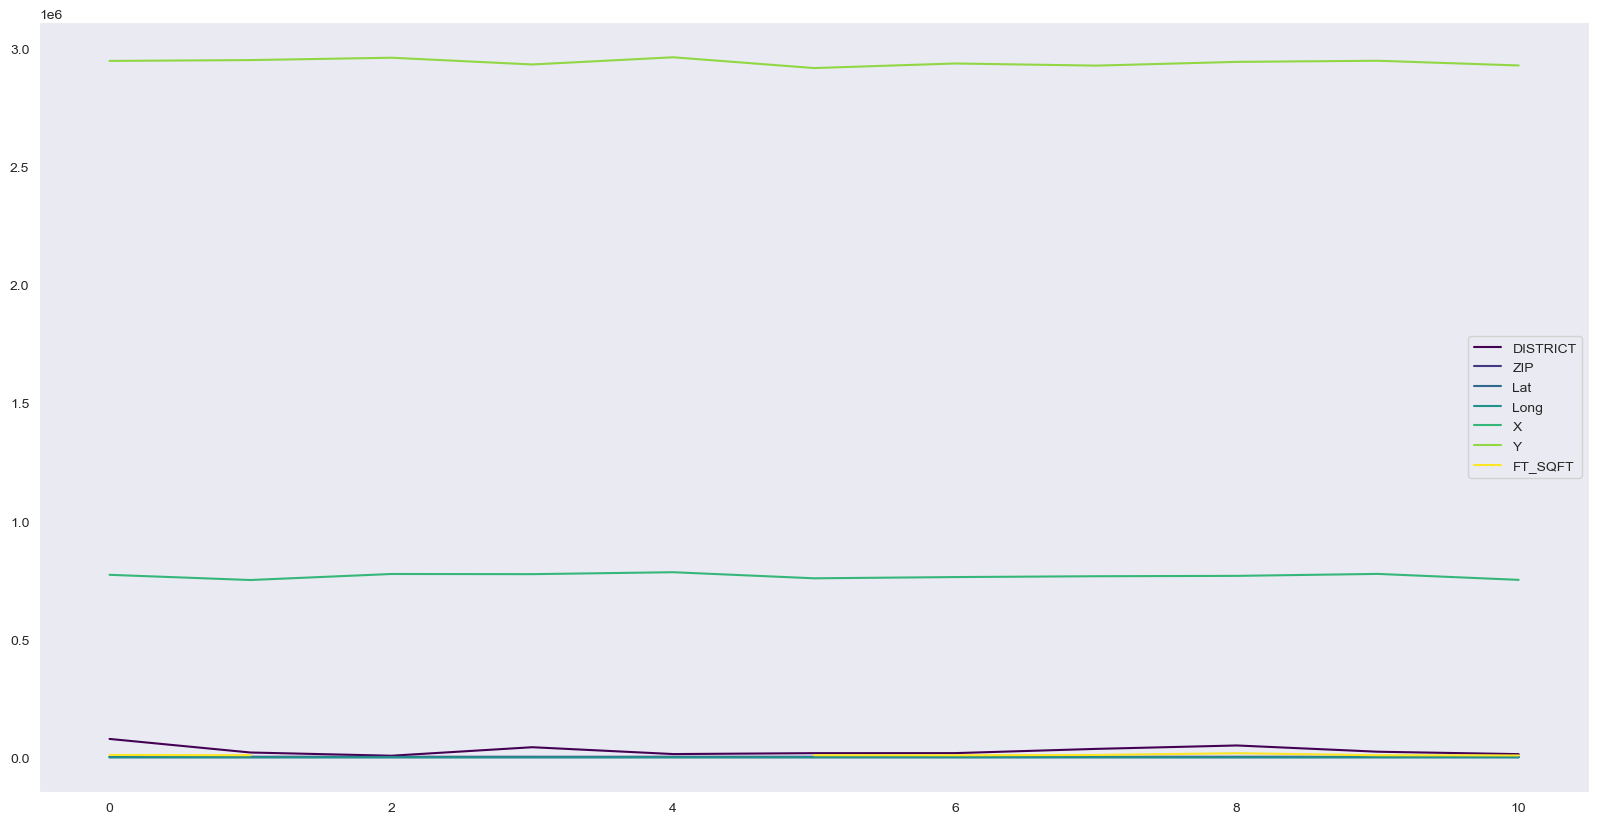

In [247]:
import matplotlib.patheffects as pe
sns.set_style('dark')

ax = new_grouped_df.plot(column='DISTRICT', cmap='viridis', legend=True, figsize=(20,10))
for idx, row in new_grouped_df_gdf.iterrows():
    plt.annotate(s=row['NEIGHBORHOOD'], xy=row['COORDINATES'],horizontalalignment='center', color='midnightblue', path_effects=[pe.withStroke(linewidth=2, foreground="white")], weight='bold', fontsize=8, rotation=30)
ax.axis('off')
plt.tight_layout()
plt.show()

In [114]:
# map
map_layer_control = folium.Map(location=[boston_Police_HQ_selected["COORDINATES"]], zoom_start=12)

# add tiles to map
folium.TileLayer('Open Street Map', attr="Open Street Map").add_to(map_layer_control)
folium.TileLayer('Stamen Terrain', attr="Stamen").add_to(map_layer_control)
folium.TileLayer('Stamen Toner', attr="Stamen").add_to(map_layer_control)
folium.TileLayer('Stamen Watercolor', attr="Stamen").add_to(map_layer_control)
folium.TileLayer('CartoDB Positron', attr="CartoDB").add_to(map_layer_control)
folium.TileLayer('CartoDB Dark_Matter', attr="CartoDB").add_to(map_layer_control)

# add layer control to show different maps
folium.LayerControl().add_to(map_layer_control)

# display map
map_layer_control

ValueError: Expected two (lat, lon) values for location, instead got: [NAME
District E-18 Police Station    (757882.716119558, 2918709.80817914)
District E-5 Police Station     (751313.455964133, 2929725.22742122)
District A-7 Police Station       (783655.30236955, 2964399.6744764)
District A-1 Police Station     (775000.193367466, 2957181.41102581)
District D-14 Police Station    (750621.846126884, 2952538.58205689)
District A-15 Police Station    (776123.775109798, 2962523.04371522)
District C-6 Police Station     (776491.052918553, 2949659.65507197)
District D-4 Police Station     (772627.277181551, 2949011.41128972)
Boston Police Headquarters       (766821.655590728, 2947070.5513263)
District B-2 Police Station     (768200.917595968, 2944961.00797322)
District E-13 Police Station    (763106.941235393, 2938135.58428815)
District B-3 Police Station     (766649.868860811, 2929044.05161823)
District C-11 Police Station    (775429.012391716, 2933947.91156115)
Name: COORDINATES, dtype: object].

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, District E-18 Police Station to District C-11 Police Station
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           13 non-null     int64  
 1   X             13 non-null     float64
 2   Y             13 non-null     float64
 3   ADDRESS       13 non-null     object 
 4   ZIP           13 non-null     int64  
 5   PARCEL_ID     13 non-null     int64  
 6   OBJECTID      13 non-null     int64  
 7   BLDG_ID       13 non-null     object 
 8   BID           13 non-null     int64  
 9   POINT_X       13 non-null     float64
 10  POINT_Y       13 non-null     float64
 11  NEIGHBORHOOD  13 non-null     object 
 12  CITY          13 non-null     object 
 13  FT_SQFT       11 non-null     float64
 14  STORY_HT      12 non-null     float64
 15  District      12 non-null     object 
dtypes: float64(6), int64(5), object(5)
memory usage: 1.7+ KB


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
geo = gpd.read_file(r'../input/boston-neighborhoods-geojson/Boston_Neighborhoods.geojson')

# Removing abnormal data and transforming the data
serious = serious[(serious['Lat']>40) & (serious['Long']<-69)]
serious_gdf = gpd.GeoDataFrame(serious)
serious_gdf['geometry'] =  gpd.GeoSeries(serious_gdf.apply(lambda s: Point((s['Long'], s['Lat'])), axis=1))

# Merging GDFs
intersects_gdf = gpd.sjoin(serious_gdf, geo, op='within', how='right')
display(intersects_gdf.head(2))

# Getting number of serious crimes per neighborhood and preparing for plot
crimes_per_nb = gpd.GeoDataFrame(intersects_gdf.groupby('Name')['INCIDENT_NUMBER'].count().to_frame('Crimes') \
                                    .merge(geo.set_index('Name'), left_index=True, right_index=True, how='inner')) \
                                    .reset_index()
crimes_per_nb['coords'] = crimes_per_nb['geometry'].apply(lambda x: x.representative_point().coords[:])
crimes_per_nb['coords'] = [coords[0] for coords in crimes_per_nb['coords']]
display(crimes_per_nb.head())


NameError: name 'NaN' is not defined

In [44]:
condicion = Crime_data["YEAR"] ==2015
Crime_data[condicion].count()

INCIDENT_NUMBER        53388
OFFENSE_CODE           53388
OFFENSE_CODE_GROUP     53388
OFFENSE_DESCRIPTION    53388
DISTRICT               53260
REPORTING_AREA         53388
SHOOTING                 185
OCCURRED_ON_DATE       53388
YEAR                   53388
MONTH                  53388
DAY_OF_WEEK            53388
HOUR                   53388
UCR_PART               53387
STREET                 52106
Lat                    51207
Long                   51207
Location               53388
dtype: int64

In [49]:
Crime_data_2015 = Crime_data[condicion]
Crime_data_2015

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
4363,I182066132,2629,Harassment,HARASSMENT,B3,455,NaN,2015-07-31 23:27:00,2015,7,Friday,23,Part Two,RADCLIFFE ST,42.300202,-71.078354,"(42.30020194, -71.07835353)"
8793,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,BERNARD,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
14715,I182054888,2647,Other,THREATS TO DO BODILY HARM,B2,326,NaN,2015-07-12 15:37:00,2015,7,Sunday,15,Part Two,FAYSTON ST,42.312243,-71.075499,"(42.31224327, -71.07549901)"
16645,I182052842,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,619,NaN,2015-12-20 14:00:00,2015,12,Sunday,14,Part Two,WESTLAND AVE,42.343917,-71.089675,"(42.34391716, -71.08967541)"
16646,I182052842,619,Larceny,LARCENY ALL OTHERS,D4,619,NaN,2015-12-20 14:00:00,2015,12,Sunday,14,Part One,WESTLAND AVE,42.343917,-71.089675,"(42.34391716, -71.08967541)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319064,I080542626-00,1848,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
319065,I080542626-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"


In [55]:
Crime_data_2015.set_index("YEAR")

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
YEAR,,,,,,,,,,,,,,,,
2015,I182066132,2629,Harassment,HARASSMENT,B3,455,NaN,2015-07-31 23:27:00,7,Friday,23,Part Two,RADCLIFFE ST,42.300202,-71.078354,"(42.30020194, -71.07835353)"
2015,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,2015-06-15 00:00:00,6,Monday,0,Part Three,BERNARD,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
2015,I182054888,2647,Other,THREATS TO DO BODILY HARM,B2,326,NaN,2015-07-12 15:37:00,7,Sunday,15,Part Two,FAYSTON ST,42.312243,-71.075499,"(42.31224327, -71.07549901)"
2015,I182052842,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,619,NaN,2015-12-20 14:00:00,12,Sunday,14,Part Two,WESTLAND AVE,42.343917,-71.089675,"(42.34391716, -71.08967541)"
2015,I182052842,619,Larceny,LARCENY ALL OTHERS,D4,619,NaN,2015-12-20 14:00:00,12,Sunday,14,Part One,WESTLAND AVE,42.343917,-71.089675,"(42.34391716, -71.08967541)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,I080542626-00,1848,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,A1,111,NaN,2015-08-12 12:00:00,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
2015,I080542626-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",A1,111,NaN,2015-08-12 12:00:00,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
2015,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"


In [63]:
Crime_data_Clean = Crime_data_2015.drop(["INCIDENT_NUMBER","OFFENSE_CODE","OFFENSE_CODE_GROUP","OFFENSE_DESCRIPTION","SHOOTING","OCCURRED_ON_DATE", "HOUR","UCR_PART","STREET","DAY_OF_WEEK"], axis=1)
Crime_data_Clean

,DISTRICT,REPORTING_AREA,YEAR,MONTH,Lat,Long,Location
4363,B3,455,2015,7,42.300202,-71.078354,"(42.30020194, -71.07835353)"
8793,NaN,,2015,6,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
14715,B2,326,2015,7,42.312243,-71.075499,"(42.31224327, -71.07549901)"
16645,D4,619,2015,12,42.343917,-71.089675,"(42.34391716, -71.08967541)"
16646,D4,619,2015,12,42.343917,-71.089675,"(42.34391716, -71.08967541)"
...,...,...,...,...,...,...,...
319064,A1,111,2015,8,42.352312,-71.063705,"(42.35231190, -71.06370510)"
319065,A1,111,2015,8,42.352312,-71.063705,"(42.35231190, -71.06370510)"
319069,E18,520,2015,7,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,E18,520,2015,7,42.255926,-71.123172,"(42.25592648, -71.12317207)"


In [64]:
Crime_data_Clean["DISTRICT"].nunique()

12

DISTRICT
B2     49945
C11    42530
D4     41915
A1     35717
B3     35442
C6     23460
D14    20127
E13    17536
E18    17348
A7     13544
E5     13239
A15     6505
NaN     1765
Name: count, dtype: int64